Name: Nikhil Supekar <br>
NetID: ns4486

In [205]:
import sys
import math
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [206]:
INPUT_FILE_PATH = '../data/ridge_regression/ridge_regression_dataset.csv'
PLOT_DIM = (15, 9)

# Computing Risk

### Computing Risk - Question 1a)

$$
\begin{aligned}
E[\| x \|^2] & = E[\sum_{i=1}^{n} x_i^2] \\
& = \sum_{i=1}^{n} E[x_i^2] \\
& = \sum_{i=1}^{n} \sum_{j=1, y_j\in Range(x_i)}^{5} y_j^2 p(y_j) \\
& = \sum_{i=1}^{n} (-2)^2 \frac{1}{5} + (-1)^2 \frac{1}{5} + (-0)^2 \frac{1}{5} + (1)^2 \frac{1}{5} + (2)^2 \frac{1}{5} \\
& = \sum_{i=1}^{n} 2 \\
& = 2n
\end{aligned}
$$

### Computing Risk - Question 1b)

$$
\begin{array}{l}{\text { Let } y=\max \left|x_{i}\right|} \\ {P(y=0)=\left(\frac{1}{5}\right)^{n}} \\ {P(y=2)=1-P(y \neq 2)}\end{array}\\
\begin{array}{l}{=1-\left[P\left(\left|x_{i}\right|=0 \quad x\left|x_{i}\right|=1\right)\right]^{n}} \\ {=1-\left[P\left(x_{i}=0 \quad x \quad x_{i}=1 \quad x_{i}=-1\right)\right]^{n}} \\ {=1-\left[P\left(x_{i}=0\right)+P\left(x_{i}=1\right)+P\left(x_{i}=-1\right)\right]^{n}} \\ {=1-\left[\frac{1}{5}+\frac{1}{5}+\frac{1}{5}\right]^{n}} \\ {=1-\left(\frac{3}{5}\right)^{n}}\end{array} \\ \\

\begin{aligned} P(y=1) &=1-P(y=2)-P(y=0) \\ &=1-\left(1-\left(\frac{3}{5}\right)^{n}\right)-\left(\frac{1}{5}\right)^{n} \\ &=\frac{3^{n}-1}{5^{n}} \end{aligned}\\ \\


\begin{aligned} E[Y] &=\sum y p(y) \\ &=0 \cdot P(y=0)+1 \cdot P(y=1)+2 \cdot P(y=2) \\ &=\frac{3^{n}-1}{5^{-4}}+2 \cdot\left(1-\frac{3^{n}}{5^{n}}\right) \\ &=\frac{3^{n}-1+2 \times 5^{n}-2 \times 3^{n}}{5^{n}} \\ &=\frac{2 \times 5^{n}-3^{n}-1}{5^{n}}=2-\frac{3^{n}+1}{5^{n}} \end{aligned}

$$

### Computing Risk - Question 1c)

$$
\begin{aligned}
Cov(\overrightarrow{x}) & = [Cov(x_i, x_j)]_{ij} \\
& = [0] \text{if}\ i \neq j \text{(since $x_i$ are iid)}\\
&   [Var(x_i)] \text{otherwise} \\
& = [0] \text{if}\ i \neq j \\
&   [2] \text{otherwise} \\
& = 2 I_n \text{[In is the nxn identity matrix]}
\end{aligned}
$$

### Computing Risk - Question 2a)

$$
\begin{aligned}
E[(a - y)^2]& = E[(a - E[y] + E[y] - y)^2] \\
& = E[(a - E[y])^2] + E[(E[y] - y)^2] + E[2(a - E[y])(E[y] - y)] && \text{... (linearity of expectation)}\\
& = E[(a - E[y])^2] + E[(E[y] - y)^2] + 2 E[(a - E[y])(E[y] - y)] \\
& = E[(a - E[y])^2] + E[(E[y] - y)^2] + 2 E[E[(a - E[y])(E[y] - y) \mid y]] && \text{... (iterated expectation)} \\
& = E[(a - E[y])^2] + E[(E[y] - y)^2] + 2 E[E[a E[y] - a y - E[y]^2 + E[y] y] \mid y]] \\
& = E[(a - E[y])^2] + E[(E[y] - y)^2] + 2 E[E[a E[y] \mid y] - E[a y \mid y] - E[E[y]^2 \mid y] + E[E[y] y \mid y]] \\
& = E[(a - E[y])^2] + E[(E[y] - y)^2] + 2 E[E[y \mid y] E[a \mid y] - y E[a \mid y] - E[y]^2 + E[y]^2]] \\
& = E[(a - E[y])^2] + E[(E[y] - y)^2] + 2 E[y E[a \mid y] - y E[a \mid y] + 0] \\
& = E[(a - E[y])^2] + E[(E[y] - y)^2] + 2 E[0] \\
& = E[(a - E[y])^2] + E[(E[y] - y)^2] \\ \\

(a - E[y])^2 \geq 0 & \Rightarrow E[(a - E[y])^2] \geq 0 \\
& \Rightarrow E[(a - E[y])^2] + E[(E[y] - y)^2] \geq E[(E[y] - y)^2] \\
& \Rightarrow E[(a - y)^2] \geq E[(E[y] - y)^2] \\ \\

E[(a - y)^2] & = E[(E[y] - y)^2] \\
& \Leftrightarrow E[(a - E[y])^2] = 0 \\
& \Leftrightarrow a = E[y] \\ \\

& \Rightarrow min_{a}(E[(a - y)^2]) = E[(E[y] - y)^2] \\
& \Rightarrow argmin_{a}(E[(a - y)^2]) = E[y]\\
& \Rightarrow a^{*} = E[y] \\
\end{aligned}
$$

Bayes' Risk is given by:
$$
\begin{aligned}
R(a^{*}) & = R(E[y]) \\
& = E[(E[y] - y)^2] \\
& = E[E[y]^2 - 2 E[y] y + y^2] \\
& = E[E[y]^2] - 2 E[E[y] y] + E[y^2] \\
& = E[y]^2 - 2 E[y] E[y] + E[y^2] \\
& = E[y^2] - E[y]^2 \\
& = Var(y) \\
\end{aligned}
$$

### Computing Risk - Question 2b) - Part i)

$$
\begin{align}
E[(a - y)^2 \mid x] & = E[(a - E[y \mid x] + E[y \mid x] - y)^2 \mid x] \\
& = E[(a - E[y \mid x])^2 + (E[y \mid x] - y)^2 + 2(a - E[y \mid x])(E[y \mid x] - y) \mid x] && \text{... (linearity of expectation)}\\
& = E[(a - E[y \mid x])^2 \mid x] + E[(E[y \mid x] - y)^2 \mid x] + 2 E[(a - E[y \mid x])(E[y \mid x] - y) \mid x] \\
& = E[(a - E[y \mid x])^2 \mid x] + E[(E[y \mid x] - y)^2 \mid x] + 2 E[a E[y \mid x] - a y - E[y \mid x]^2 + E[y \mid x] y \mid x] \\
& = E[(a - E[y \mid x])^2 \mid x] + E[(E[y \mid x] - y)^2 \mid x] + 2 (E[a E[y \mid x] \mid x] - E[a y \mid x] - E[E[y \mid x]^2 \mid x] + E[E[y \mid x] y \mid x]) \\
& = E[(a - E[y \mid x])^2 \mid x] + E[(E[y \mid x] - y)^2 \mid x] + 2 (E[E[y \mid x] E[a \mid x] - a E[y \mid x] - E[y \mid x]^2 + E[y \mid x]^2]) \\
& = E[(a - E[y \mid x])^2 \mid x] + E[(E[y \mid x] - y)^2 \mid x] + 2 (0) \\
& = E[(a - E[y \mid x])^2 \mid x] + E[(E[y \mid x] - y)^2 \mid x] \\ \\

(a - E[y \mid x])^2 \geq 0 & \Rightarrow E[(a - E[y \mid x])^2 \mid x] \geq 0\\
& \Rightarrow E[(a - E[y \mid x])^2 \mid x] + E[(E[y \mid x] - y)^2 \mid x] \geq E[(E[y \mid x] - y)^2 \mid x]\\
& \Rightarrow E[(a - y)^2 \mid x] \geq E[(E[y \mid x] - y)^2 \mid x] && \text{... (1)}\\ \\

E[(a - y)^2 \mid x] & = E[(E[y \mid x] - y)^2 \mid x] \\
& \Leftrightarrow E[(a - E[y \mid x])^2 \mid x] = 0 \\
& \Leftrightarrow a - E[y \mid x] = 0 \\
& \Leftrightarrow a = E[y \mid x] \\
& \Leftrightarrow f(x) = E[y \mid x] \\
& \Rightarrow f^{*}(x) = E[y \mid x] && \text{... (2)} \\ \\

\end{align}
$$



### Computing Risk - Question 2b) - Part ii)

$$
\begin{align}
(1), (2) & \Rightarrow E[(a - y)^2 \mid x] \geq E[(E[y \mid x] - y)^2 \mid x] \\
& \Rightarrow E[(a - y)^2 \mid x] \geq E[(f^{*}(x) - y)^2 \mid x] \\
& \Rightarrow E[(f(x) - y)^2 \mid x] \geq E[(f^{*}(x) - y)^2 \mid x] \\ \\

E[(f(x) - y)^2] & = E[E[(f(x) - y)^2 \mid x]] && \text{... (iterated expectation)} \\
& = E[E[(f(x) - E[y \mid x] + E[y \mid x] - y)^2 \mid x]] \\
& = E[E[(f(x) - E[y \mid x])^2 \mid x] + E[(E[y \mid x] - y)^2 \mid x] + 2 E[(f(x) - E[y \mid x])(E[y \mid x] - y) \mid x]] \\
& = E[E[(f(x) - E[y \mid x])^2 \mid x]] + E[E[(E[y \mid x] - y)^2 \mid x]] + 2 E[[(f(x) - E[y \mid x])(E[y \mid x] - y) \mid x]] \\
& = E[(f(x) - E[y \mid x])^2] + E[(E[y \mid x] - y)^2] + 2 E[f(x) E[y \mid x] - f(x) y - E[y \mid x]^2 + E[y \mid x] y \mid x] \\
& = E[(f(x) - E[y \mid x])^2] + E[(E[y \mid x] - y)^2] + 2 (E[y \mid x] E[f(x) \mid x] - E[f(x) y \mid x] - E[E[y \mid x]^2] + E[y \mid x] E[y \mid x]) \\
& = E[(f(x) - E[y \mid x])^2] + E[(E[y \mid x] - y)^2] + 2 (E[y \mid x] f(x) - f(x) E[y \mid x] - E[y \mid x]^2 + E[y \mid x]^2) \\
& = E[(f(x) - E[y \mid x])^2] + E[(E[y \mid x] - y)^2] + 2(0) \\
& = E[(f(x) - E[y \mid x])^2] + E[(E[y \mid x] - y)^2] \\
& = E[(f(x) - E[y \mid x])^2] + E[(f^{*}(x) - y)^2] && \text{... (by (2))} \\ \\

(f(x) - E[y \mid x])^2 \geq 0 & \Rightarrow E[(f(x) - E[y \mid x])^2] \geq 0 \\
& \Rightarrow E[(f(x) - E[y \mid x])^2] + E[(f^{*}(x) - y)^2] \geq E[(f^{*}(x) - y)^2] \\
& \Rightarrow E[(f(x) - y)^2] \geq E[(f^{*}(x) - y)^2] \\
\end{align}
$$

# Linear Regression

### Linear Regression - Question 1a)

In [207]:
### Feature normalization
def feature_normalization(train, test):
    """Rescale the data so that each feature in the training set is in
    the interval [0,1], and apply the same transformations to the test
    set, using the statistics computed on the training set.

    Args:
        train - training set, a 2D numpy array of size (num_instances, num_features)
        test - test set, a 2D numpy array of size (num_instances, num_features)

    Returns:
        train_normalized - training set after normalization
        test_normalized - test set after normalization
    """
    num_instances = train.shape[0]
    num_features = train.shape[1]
    
    mean_vec = np.apply_along_axis(np.mean, 0, train)
    std_vec = np.apply_along_axis(np.std, 0, train)
    
    const_feature_indices = np.where(std_vec == 0)
    train = np.delete(train, const_feature_indices, 1)
    test = np.delete(test, const_feature_indices, 1)
    # mean_vec = np.delete(mean_vec, const_feature_indices, 0)
    # std_vec = np.delete(mean_vec, const_feature_indices, 0)
    
    min_vec = np.min(train, axis = 0)
    max_vec = np.max(train, axis = 0)
    # train_normalized = (train - mean_vec) / std_vec
    # test_normalized = (test - mean_vec) / std_vec

    train_normalized = (train - min_vec) / (max_vec - min_vec)
    test_normalized = (test - min_vec) / (max_vec - min_vec)


    return train_normalized, test_normalized

### Linear Regression - Question 2a)
$$
J(\theta) = \frac{1}{m} \|X \theta - y\|^2
$$

### Linear Regression - Question 2b)

$$
\nabla J(\theta) = \frac{2}{m} X^{T}(X \theta - y)
$$

### Linear Regression - Question 2c)

$$
\begin{align}
J(\theta + \eta h) - J(\theta) & = \eta \left<h, \nabla J(\theta)\right> \\
\end{align}
$$

### Linear Regression - Question 2d)

$$
\begin{align}
\theta_{i+1} & = \theta_{i} - \eta \nabla J(\theta_{i}) \\
& = \theta_{i} - \frac{2 \eta}{m} X^{T} (X \theta - y) \\
\end{align}
$$

### Linear Regression - Question 2e)

In [208]:
def compute_square_loss(X, y, theta):
    """
    Given a set of X, y, theta, compute the average square loss for predicting y with X*theta.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D array of size (num_features)

    Returns:
        loss - the average square loss, scalar
    """
    m = X.shape[0]
    return np.linalg.norm(np.dot(X, theta) - y) ** 2 / m


### Linear Regression - Question 2f)

In [209]:
def compute_square_loss_gradient(X, y, theta):
    """
    Compute the gradient of the average square loss (as defined in compute_square_loss), at the point theta.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)

    Returns:
        grad - gradient vector, 1D numpy array of size (num_features)
    """
    m = X.shape[0]
    return np.transpose(X).dot(np.dot(X, theta) - y) * 2 / m

### Linear Regression - Question 3a)

In [252]:
#######################################
### Gradient checker
#Getting the gradient calculation correct is often the trickiest part
#of any gradient-based optimization algorithm. Fortunately, it's very
#easy to check that the gradient calculation is correct using the
#definition of gradient.
#See http://ufldl.stanford.edu/wiki/index.php/Gradient_checking_and_advanced_optimization
def grad_checker(X, y, theta, epsilon=0.01, tolerance=1e-4):
    """Implement Gradient Checker
    Check that the function compute_square_loss_gradient returns the
    correct gradient for the given X, y, and theta.

    Let d be the number of features. Here we numerically estimate the
    gradient by approximating the directional derivative in each of
    the d coordinate directions:
    (e_1 = (1,0,0,...,0), e_2 = (0,1,0,...,0), ..., e_d = (0,...,0,1))

    The approximation for the directional derivative of J at the point
    theta in the direction e_i is given by:
    ( J(theta + epsilon * e_i) - J(theta - epsilon * e_i) ) / (2*epsilon).

    We then look at the Euclidean distance between the gradient
    computed using this approximation and the gradient computed by
    compute_square_loss_gradient(X, y, theta).  If the Euclidean
    distance exceeds tolerance, we say the gradient is incorrect.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
        epsilon - the epsilon used in approximation
        tolerance - the tolerance error

    Return:
        A boolean value indicating whether the gradient is correct or not
    """
    true_gradient = compute_square_loss_gradient(X, y, theta) #The true gradient
    num_features = theta.shape[0]
    approx_grad = np.zeros(num_features) #Initialize the gradient we approximate
    
    J = compute_square_loss
    
    for i in range(num_features):
        approx_grad[i] = (J(X, y, theta + epsilon * np.eye(1, num_features, i).transpose()) \
                        - J(X, y, theta - epsilon * np.eye(1, num_features, i)).transpose()) / (2 * epsilon)
    
    return np.linalg.norm(approx_grad, true_gradient) <= tolerance

In [253]:
def generic_gradient_checker(X, y, theta, objective_func, gradient_func, epsilon=0.01, tolerance=1e-4):
    """
    The functions takes objective_func and gradient_func as parameters. 
    And check whether gradient_func(X, y, theta) returned the true 
    gradient for objective_func(X, y, theta).
    Eg: In LSR, the objective_func = compute_square_loss, and gradient_func = compute_square_loss_gradient
    """
    true_gradient = gradient_func(X, y, theta) #The true gradient
    num_features = theta.shape[0]
    approx_grad = np.zeros(num_features) #Initialize the gradient we approximate
    
    J = objective_func
    
    for i in range(num_features):
        approx_grad[i] = (J(X, y, theta + epsilon * np.eye(1, num_features, i)) \
                        - J(X, y, theta - epsilon * np.eye(1, num_features, i))) / (2 * epsilon)
    
    return np.linalg.norm(approx_grad, true_gradient) <= tolerance

### Linear Regression - Question 4a)

In [263]:
#######################################
### Batch gradient descent
def batch_grad_descent(X, y, alpha=0.1, num_step=1000, grad_check=False):
    """
    In this question you will implement batch gradient descent to
    minimize the average square loss objective.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        num_step - number of steps to run
        grad_check - a boolean value indicating whether checking the gradient when updating

    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size (num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step (num_step) is theta_hist[-1]
        loss_hist - the history of average square loss on the data, 1D numpy array, (num_step+1)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta_hist = np.zeros((num_step+1, num_features)) #Initialize theta_hist
    loss_hist = np.zeros(num_step+1) #Initialize loss_hist
    theta = np.zeros(num_features) #Initialize theta
    
    for i in range(1, num_step + 1):
        theta = theta_hist[i - 1, :] - alpha * compute_square_loss_gradient(X, y, theta_hist[i - 1, :])
        if grad_check:
            if not grad_checker(X, y, theta, 10**-4, 10**-4):
                print("grad check mismatch for step {}".format(i))
        theta_hist[i, :] = theta
        loss_hist[i] = compute_square_loss(X, y, theta)
    
    return theta_hist, loss_hist

### Linear Regression - Question 4b)

In [264]:

df = pd.read_csv(INPUT_FILE_PATH, delimiter=',')
X = df.values[:,:-1]
y = df.values[:,-1]

print('Split into Train and Test')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =100, random_state=10)

print("Scaling all to [0, 1]")
X_train, X_test = feature_normalization(X_train, X_test)
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))  # Add bias term

Split into Train and Test
Scaling all to [0, 1]


Text(0, 0.5, 'avg loss')

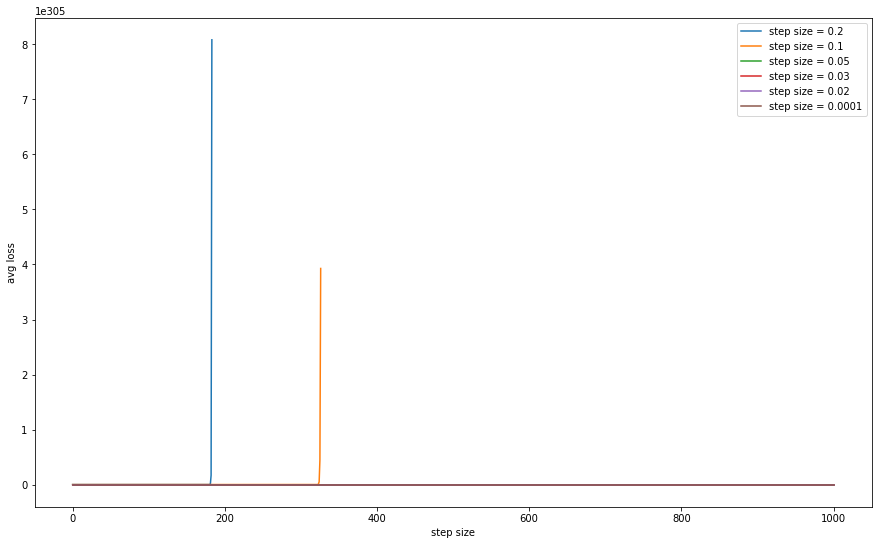

In [265]:
fig, ax = plt.subplots(figsize = PLOT_DIM)

STEP_SIZES_1 = [0.2, 0.1, 0.05, 0.03, 0.02, 0.0001]
num_iterations = 1000
alpha = 0.015

for step_size in STEP_SIZES_1:
    theta, loss = batch_grad_descent(X_train, y_train, alpha=step_size, num_step=num_iterations)
    ax.plot(list(range(num_iterations + 1)), loss, label = 'step size = ' + str(step_size))
ax.legend()
plt.xlabel('step size')
plt.ylabel('avg loss')

As seen above, gradient descent doesn't converge for step sizes - 0.2, 0.1, 0.05, 0.03 but seems to be bounded for 0.02. <br>
We should try even smaller step sizes.

Step size = 0.005. 	 Loss after 1000 iterations = 3.7577342027994045,  	 Time taken = 0.016433000564575195
Step size = 0.007. 	 Loss after 1000 iterations = 3.223213599427493,  	 Time taken = 0.017406940460205078
Step size = 0.01. 	 Loss after 1000 iterations = 2.785458418767557,  	 Time taken = 0.019415855407714844
Step size = 0.02. 	 Loss after 1000 iterations = 2.322569667370491,  	 Time taken = 0.02144002914428711
Step size = 0.05. 	 Loss after 1000 iterations = 2.0776993701242232,  	 Time taken = 0.018391847610473633
Step size = 0.05042. 	 Loss after 1000 iterations = 2.0764350422707722,  	 Time taken = 0.02034592628479004
Step size = 0.0506. 	 Loss after 1000 iterations = 7.928876171841787,  	 Time taken = 0.017024993896484375

Average time taken = 0.01863694190979004


Text(0, 0.5, 'avg loss')

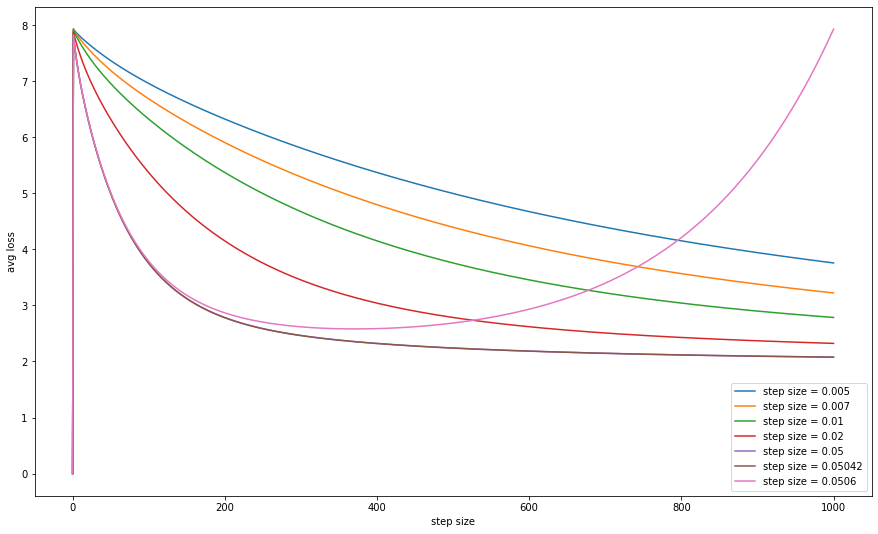

In [215]:
fig, ax = plt.subplots(figsize = PLOT_DIM)

STEP_SIZES_2 = [0.005, 0.007, 0.01, 0.02, 0.05, 0.05042, 0.0506]
num_iterations = 1000
alpha = 0.015
times = []
for step_size in STEP_SIZES_2:
    start = time.time()
    theta, loss = batch_grad_descent(X_train, y_train, alpha=step_size, num_step=num_iterations)
    end = time.time()
    ax.plot(list(range(num_iterations + 1)), loss, label = 'step size = ' + str(step_size))
    print('Step size = {}. \t Loss after 1000 iterations = {},  \t Time taken = {}'.format(step_size, loss[-1], end - start))
    times.append(end - start)

print('\nAverage time taken = ' + str(np.mean(times)))

ax.legend()
plt.xlabel('step size')
plt.ylabel('avg loss')

#### Observations

With 1000 iterations, we observe that the algorithm does converge with step size = 0.005.<br>
However, the average loss after 1000 iterations is smaller for step size = 0.007 compared to that of 0.005. <br>
Therefore, we should aim to find the maximum step size in \[0.005, 0.02\] for which the average loss is minimum. <br>
Performing a binary search on the step size, we observe that the loss is at a minimum of 2.0764350422707722 <br>
for a step size = 0.05042 and starts increasing again after we cross that step size. <br>
For example, for step size = 0.0506, the loss is clearly diverging as seen in the graph above.<br><br>
Therefore, a reasonable estimate for the step size is 0.05042.<br>


In [216]:
BEST_STEP_SIZE = 0.05042

### Linear Regression - Question 4c)

In [217]:
def backtracking_line_search(x, beta = 0.8):
    t = 1
    def f(theta):
        return compute_square_loss(X_train, y_train, theta)
    
    def grad_f(theta):
        return compute_square_loss_gradient(X_train, y_train, theta)

    while f(x - t * grad_f(x)) > f(x) - t * (np.linalg.norm(grad_f(x)) ** 2) / 2:
        t = beta * t
    
    return t

def batch_grad_descent_backtrack(X, y, alpha=0.1, num_step=1000, grad_check=False, beta=0.8):
    """
    In this question you will implement batch gradient descent to
    minimize the average square loss objective.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        num_step - number of steps to run
        grad_check - a boolean value indicating whether checking the gradient when updating

    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size (num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step (num_step) is theta_hist[-1]
        loss_hist - the history of average square loss on the data, 1D numpy array, (num_step+1)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta_hist = np.zeros((num_step+1, num_features)) #Initialize theta_hist
    loss_hist = np.zeros(num_step+1) #Initialize loss_hist
    theta = np.zeros(num_features) #Initialize theta
    
    alpha = 0
    for i in range(1, num_step + 1):
        alpha = backtracking_line_search(theta_hist[i - 1, :], beta)
        theta = theta_hist[i - 1, :] - alpha * compute_square_loss_gradient(X, y, theta_hist[i - 1, :])
        theta_hist[i, :] = theta
        loss_hist[i] = compute_square_loss(X, y, theta)
    
    return theta_hist, loss_hist, alpha

Beta = 0.5 	Loss after 1000 iterations = 2.0080493581327956 	Alpha = 0.03125 	Time = 0.22278499603271484
Beta = 0.6 	Loss after 1000 iterations = 1.9844699026647614 	Alpha = 1 	Time = 0.24146318435668945
Beta = 0.65 	Loss after 1000 iterations = 2.024009201972881 	Alpha = 0.03186448128906252 	Time = 0.29076409339904785
Beta = 0.7 	Loss after 1000 iterations = 1.9846751433902472 	Alpha = 0.019773267429999988 	Time = 0.32531094551086426
Beta = 0.8 	Loss after 1000 iterations = 1.9993910543404558 	Alpha = 0.2097152000000001 	Time = 0.464216947555542
Beta = 0.9 	Loss after 1000 iterations = 1.9888343522197638 	Alpha = 1 	Time = 0.8705589771270752

Average time taken = 0.40251652399698895


Text(0, 0.5, 'avg loss')

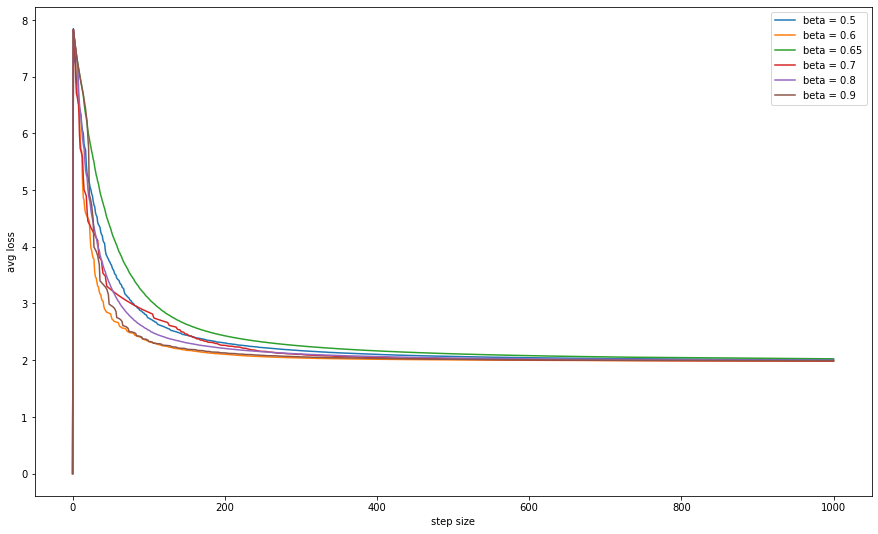

In [218]:
fig, ax = plt.subplots(figsize = PLOT_DIM)

beta_list = [0.5, 0.6, 0.65, 0.7, 0.8, 0.9]
num_iterations = 1000
alpha = 0.015
times = []

for beta in beta_list:
    start = time.time()
    theta, loss, alpha = batch_grad_descent_backtrack(X_train, y_train, alpha=BEST_STEP_SIZE, num_step=num_iterations, beta = beta)
    end = time.time()
    ax.plot(list(range(num_iterations + 1)), loss, label = 'beta = ' + str(beta))
    print('Beta = {} \tLoss after 1000 iterations = {} \tAlpha = {} \tTime = {}'.format(beta, loss[-1], alpha, end - start))
    times.append(end - start)

print('\nAverage time taken = ' + str(np.mean(times)))

ax.legend()
plt.xlabel('step size')
plt.ylabel('avg loss')

With backtracking line search, we observe an improvement in the value of the loss function <br>
Backtracking line search gives a minimum of $1.9846751433902472$ for $\beta = 0.7$ and final step size = 0.01977 <br>
Gradient descent with constant step size gives a minimum of $2.0764350422707722$ for $\alpha = 0.05042$<br> <br>

Time taken by gradient descent = 0.0189 s <br>
Time taken with backtracking line search = 0.3980 s <br>

Adding backtracking line search to the algorithm slows it down. <br>
In this example, the delta between the two is quite low but could be significant for high number of training samples.

# Ridge Regression

### Ridge Regression - Question 1

$$
J(\theta) = \frac{1}{m} \|X \theta - y\|^2 + \lambda \theta^T \theta
$$

$$
\begin{align}
\nabla J(\theta) & = \frac{2}{m} X^{T}(X \theta - y) + 2 \lambda \theta \\
\end{align}
$$

$$
\begin{align}
\theta_{i+1} & = \theta_{i} - \eta \nabla J(\theta_{i}) \\
& = \theta_{i} - \frac{2 \eta}{m} X^{T} (X \theta - y) - 2 \lambda \eta \theta \\
\end{align}
$$


### Ridge Regression - Question 2

In [219]:
#######################################
### The gradient of regularized batch gradient descent
def compute_regularized_square_loss_gradient(X, y, theta, lambda_reg):
    """
    Compute the gradient of L2-regularized average square loss function given X, y and theta

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
        lambda_reg - the regularization coefficient

    Returns:
        grad - gradient vector, 1D numpy array of size (num_features)
    """
    m = X.shape[0]
    return np.transpose(X).dot(np.dot(X, theta) - y) * 2 / m + 2 * lambda_reg * theta

### Ridge Regression - Question 3

In [220]:
#######################################
### Regularized batch gradient descent
def regularized_grad_descent(X, y, alpha=0.05, lambda_reg=10**-2, num_step=1000):
    """
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        lambda_reg - the regularization coefficient
        num_step - number of steps to run
    
    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size (num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step (num_step+1) is theta_hist[-1]
        loss hist - the history of average square loss function without the regularization term, 1D numpy array.
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.zeros(num_features) #Initialize theta
    theta_hist = np.zeros((num_step+1, num_features)) #Initialize theta_hist
    loss_hist = np.zeros(num_step+1) #Initialize loss_hist
    
    for i in range(1, num_step + 1):
        theta_prev = theta_hist[i - 1, :]
        theta = theta_prev - alpha * compute_regularized_square_loss_gradient(X, y, theta_prev, lambda_reg) - 2 * alpha * lambda_reg * theta_prev
        theta_hist[i, :] = theta
        loss_hist[i] = compute_square_loss(X, y, theta)
    
    return theta_hist, loss_hist

### Ridge Regression - Question 4

The loss function for ridge regression with a bias B can be expressed as follows:
$$
\begin{align}
J(\theta) & = \frac{1}{m} \sum_{i = 1}^{m} (h_{\theta}(x_i) - y_i)^2 + \lambda \theta^T \theta \\
& = \frac{1}{m} ((\theta_1 x_i^{(1)} - y_1)^2 + ... + (\theta_n x_i^{(n)} - y_n)^2 + m \lambda (\theta_1^2 + ... + \theta_n^2))\\
& = \frac{1}{m} ((\theta_1 B - y_1)^2 + m \lambda \theta_1^2 + g(\theta_2, ..., \theta_n)) \\
& = \frac{1}{m} ((B^2 + m \lambda) \theta_1^2 - 2 B y_1 \theta_1 + y_1^2 + g(\theta_2, ..., \theta_n)) \\
\end{align}
$$



Regularization tries to prevent overfitting by adding a penalty to the loss function by adding quadratic terms to optimization. <br>
This ensures that the weights are distributed over the squared $\theta$ terms.<br>
With a high bias term, the co-efficient against $\theta_1$ is already high, so more of the weight distribution will happen on the other $\theta$ terms. <br>
This reduces the effect of regularization on the bias term which can be made as small as possible by increasing B. <br> This works because of the quadratic effect of B on the penalization as seen in the final equation above. <br>
Although the regularization can be made arbitrarily small, theoretically it can never be made zero since there will always be some non-zero weight assigned by the regularization to the bias term.

### Ridge Regression - Question 5

log10(lambda) = -4.0. avg test loss = 2.5739733003754255
log10(lambda) = -3.0. avg test loss = 2.547473339304538
log10(lambda) = -2.5. avg test loss = 2.499107063181761
log10(lambda) = -2.25. avg test loss = 2.4658691348761064
log10(lambda) = -2.05. avg test loss = 2.4490826356252793
log10(lambda) = -2.02. avg test loss = 2.4487406033313848
log10(lambda) = -2.025. avg test loss = 2.448740894038008
log10(lambda) = -2.0. avg test loss = 2.448984174373217
log10(lambda) = -1.98. avg test loss = 2.4496459850362076
log10(lambda) = -1.95. avg test loss = 2.4515033716473873
log10(lambda) = -1.75. avg test loss = 2.4999358850105304
log10(lambda) = -1.5. avg test loss = 2.690183027994781


Text(0, 0.5, 'avg loss')

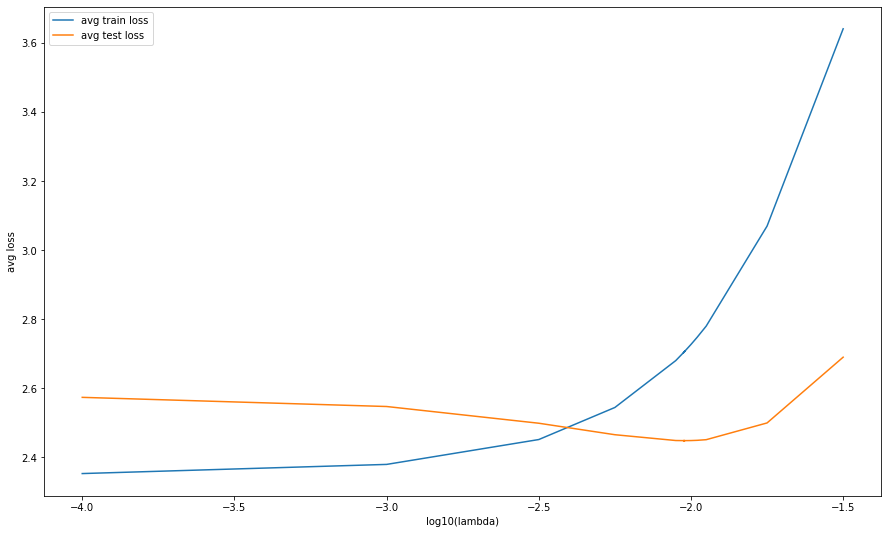

In [221]:

fig, ax = plt.subplots(figsize = PLOT_DIM)

# LAMBDA_LIST = [10**-6, 10**-2, 10**-1.8, 10**-1.7, 10**-1.65, 10**-1.6, 10**-1.55, 10**-1.5, 10**-1.495, 10**-1.496, 10**-1.4, 10**-1.3, 10**-1.25]
LAMBDA_LIST = [10**-4, 10**-3, 10**-2.5, 10**-2.25, 10**-2.05, 10**-2.02, 10**-2.025, 10**-2, 10**-1.98, 10**-1.95, 10**-1.75, 10**-1.5]
train_loss_list = []
test_loss_list = []
alpha = 0.01873
for lambda_reg in LAMBDA_LIST:
    train_theta, train_loss = regularized_grad_descent(X_train, y_train, alpha, lambda_reg)
    theta_reg = train_theta[-1, :]

    train_loss_list.append(train_loss[-1])
    test_loss = compute_square_loss(X_test, y_test, theta_reg)
    test_loss_list.append(test_loss)
    print('log10(lambda) = {}. avg test loss = {}'.format(np.log10(lambda_reg), test_loss))

ax.plot(np.log10(LAMBDA_LIST), train_loss_list, label = 'avg train loss')
ax.plot(np.log10(LAMBDA_LIST), test_loss_list, label = 'avg test loss')
ax.legend()
plt.xlabel('log10(lambda)')
plt.ylabel('avg loss')

#### Observations

By varying the regularization parameter, we observe that the average test loss curve forms a minimum around -2.0. <br>
A quick binary search on the average test loss yields a minimum of $2.544530465176994$ for $\lambda = 10^{-2.025}$.

In [222]:
train_theta, train_loss = regularized_grad_descent(X_train, y_train, 0.01873, 10**-2.025)
train_theta[-1, :]

array([-1.12293752,  0.50711746,  1.36622249,  2.0725298 , -1.52191557,
       -0.79762415, -0.76059913, -0.76059913,  0.6419093 ,  1.36164562,
        2.15260456, -0.31507748, -1.42390207, -3.55516347,  1.37800479,
        2.16444914,  1.29170347,  0.3349522 , -0.08203385, -0.08203385,
       -0.08203385, -0.01293849, -0.01293849, -0.01293849,  0.01523859,
        0.01523859,  0.01523859,  0.02892779,  0.02892779,  0.02892779,
        0.03672381,  0.03672381,  0.03672381, -0.03843444, -0.03843444,
       -0.03843444,  0.09468439,  0.09468439,  0.09468439,  0.07832819,
        0.07832819,  0.07832819,  0.07089084,  0.07089084,  0.07089084,
        0.06680295,  0.06680295,  0.06680295, -1.23646635])

### Ridge Regression - Question 6

In practice, $\theta$ should be chosen to minimize the average test loss. <br> However, we should also make sure that the model doesn't overfit and should be kept simple.<br> With increasing number of parameters, the model can become complex<br> which can be determined by the values of $\theta_i$.<br> A simple model will have small $\theta_i$ and a complex (and overfitted) model <br>will have high $\theta_i$ since it is causing high variability. <br>As seen above, this isn't the case with the given data so we can go <br>ahead and select $\theta$ that minimizes average test loss.

# Stochastic Gradient Descent

### Stochastic Gradient Descent - Question 1

$$
\begin{align}
J(\theta) & = \frac{1}{m} \sum_{i = 1}^{m} (h_{\theta}(x_i) - y_i)^2 + \lambda \theta^T \theta \\
& = \frac{1}{m} \left[ \sum_{i = 1}^{m} (h_{\theta}(x_i) - y_i)^2 + m \lambda \theta^T \theta \right] \\
& = \frac{1}{m} \left[ \sum_{i = 1}^{m} (h_{\theta}(x_i) - y_i)^2 + \sum_{i = 1}^{m} \lambda \theta^T \theta \right] \\
& = \frac{1}{m} \sum_{i = 1}^{m} \left[ h_{\theta}(x_i) - y_i)^2 + \lambda \theta^T \theta \right] \\
& = \frac{1}{m} \sum_{i = 1}^{m} f_i(\theta) \\
\end{align}
$$

$$
\begin{align}
f_i(\theta) & = (h_{\theta}(x_i) - y_i)^2 + \lambda \theta^T \theta \\
\end{align}
$$

### Stochastic Gradient Descent - Question 2

$$
\begin{align}
\nabla f_i(\theta) = 2 (x_i \theta - y_i) x_i^{T} + 2 \lambda \theta \\
\end{align}
$$

$$
\begin{align}
E[\nabla f_i(\theta)] & = \frac{1}{m} \sum_{i = 1}^{m} \nabla f_i(\theta) \\
& = \frac{1}{m} \sum_{i = 1}^{m} \left[ 2(h_{\theta}(x_i) - y_i) x_i^T + 2 \lambda \theta \right] \\
& = \frac{2}{m} \sum_{i = 1}^{m} \left( h_{\theta}(x_i) - y_i \right) x_i^T + \frac{2 \lambda \theta}{m} \sum_{i = 1}^{m} 1 \\
& = \frac{2}{m} X^T (X \theta - y) + 2 \lambda \theta \\
& = \nabla J(\theta) \\
\end{align}
$$

### Stochastic Gradient Descent - Question 3

$$
\theta_{t+1} = \theta_{t} - \eta \nabla f_i(\theta_t)
$$

### Stochastic Gradient Descent - Question 4

In [223]:
def compute_stochastic_gradient(x_i, y_i, theta, lambda_reg):
    # return 2 * (theta.transpose().dot(x_i) - y_i) * x_i + 2 * lambda_reg * theta
    return 2 * (x_i.dot(theta) - y_i) * x_i.transpose() + 2 * lambda_reg * theta

In [224]:
#######################################
### Stochastic gradient descent
def stochastic_grad_descent(X, y, alpha=0.01, lambda_reg=10**-2, num_epoch=1000, C=0.1):
    """
    In this question you will implement stochastic gradient descent with regularization term

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - string or float, step size in gradient descent
                NOTE: In SGD, it's not a good idea to use a fixed step size. Usually it's set to 1/sqrt(t) or 1/t
                if alpha is a float, then the step size in every step is the float.
                if alpha == "1/sqrt(t)", alpha = 1/sqrt(t).
                if alpha == "1/t", alpha = 1/t.
        lambda_reg - the regularization coefficient
        num_epoch - number of epochs to go through the whole training set

    Returns:
        theta_hist - the history of parameter vector, 3D numpy array of size (num_epoch, num_instances, num_features)
                     for instance, theta in epoch 0 should be theta_hist[0], theta in epoch (num_epoch) is theta_hist[-1]
        loss hist - the history of loss function vector, 2D numpy array of size (num_epoch, num_instances)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    # theta = np.ones(num_features) #Initialize theta
    theta = np.zeros(num_features)

    theta_hist = np.zeros((num_epoch, num_instances, num_features)) #Initialize theta_hist
    loss_hist = np.zeros((num_epoch, num_instances)) #Initialize loss_hist
    
    def calc_alpha(alpha, t, C = 0.1):
        if isinstance(alpha, float):
            return alpha
        
        if alpha == '1/sqrt(t)':
            return C / math.sqrt(t)
        
        if alpha == '1/t':
            return C / t

    t = 1
    for epoch in range(num_epoch):
        for i in range(num_instances):
            x_i = X[i, :]
            y_i = y[i]
            
            theta = theta - calc_alpha(alpha, t, C) * compute_stochastic_gradient(x_i, y_i, theta, lambda_reg)
            theta_hist[epoch, i, :] = theta
            loss_hist[epoch, i] = compute_square_loss(X, y, theta)

            t += 1
    
    return theta_hist, loss_hist

### Stochastic Gradient Descent - Question 5

In [225]:
def compute_regularized_square_loss(X, y, theta, lambda_reg):
    m = X.shape[0]
    return np.linalg.norm(np.dot(X, theta) - y) ** 2 / m + lambda_reg * np.dot(theta.transpose(), theta)

Text(0, 0.5, 'log10(objective function)')

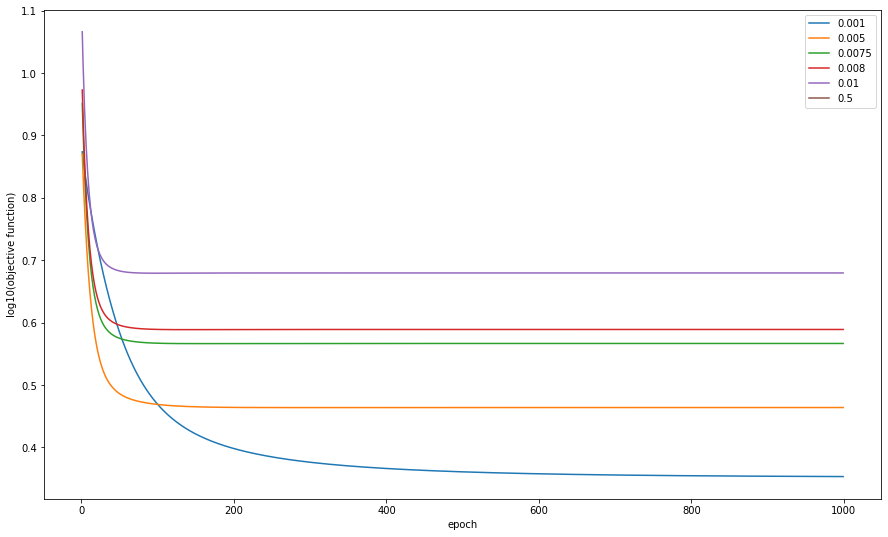

In [257]:
# SGD with constant step sizes

num_epoch = 1000
fig, ax = plt.subplots(figsize = PLOT_DIM)
EPOCH_LIST = list(range(1, num_epoch))
STEP_RULES = [0.001, 0.005, 0.0075, 0.008, 0.01, 0.5]
LAMBDA_OPT = 10**-2.025

for rule in STEP_RULES:
    train_theta, train_loss = stochastic_grad_descent(X_train, y_train, alpha=rule, lambda_reg=LAMBDA_OPT, num_epoch=num_epoch, C = 0.1)
    costs = []

    for epoch in EPOCH_LIST:
        theta_epoch = train_theta[epoch, -1, :]
        costs.append(compute_regularized_square_loss(X_train, y_train, theta_epoch, LAMBDA_OPT))
    
    ax.plot(EPOCH_LIST, np.log10(costs), label = rule)

ax.legend()
plt.xlabel('epoch')
plt.ylabel('log10(objective function)')

Text(0, 0.5, 'log10(objective function)')

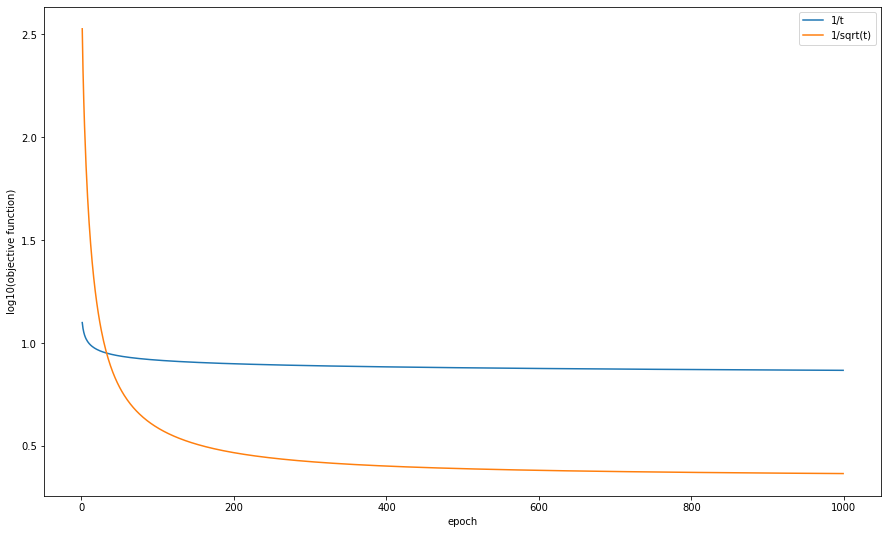

In [259]:
# SGD with variable step sizes

num_epoch = 1000
fig, ax = plt.subplots(figsize = PLOT_DIM)
EPOCH_LIST = list(range(1, num_epoch))
STEP_RULES = ['1/t', '1/sqrt(t)']
LAMBDA_OPT = 10**-2.025

for rule in STEP_RULES:
    train_theta, train_loss = stochastic_grad_descent(X_train, y_train, alpha=rule, lambda_reg=LAMBDA_OPT, num_epoch=num_epoch, C = 0.1)
    costs = []

    for epoch in EPOCH_LIST:
        theta_epoch = train_theta[epoch, -1, :]
        costs.append(compute_regularized_square_loss(X_train, y_train, theta_epoch, LAMBDA_OPT))
    
    ax.plot(EPOCH_LIST, np.log10(costs), label = rule)

ax.legend()
plt.xlabel('epoch')
plt.ylabel('log10(objective function)')

#### Observations

With $\frac{1}{t}$ and $\frac{1}{\sqrt t}$ update rules, we observe a convergence for C = 0.1 <br>
However, we are able to achieve a better value value for the loss function using the $\frac{1}{\sqrt t}$ update rule. 

### Stochastic Gradient Descent - Question 6a)

In [234]:
#######################################
### Stochastic gradient descent
def stochastic_grad_descent_1(X, y, alpha=0.01, lambda_reg=10**-2, num_epoch=1000, C=0.1):
    """
    In this question you will implement stochastic gradient descent with regularization term

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - string or float, step size in gradient descent
                NOTE: In SGD, it's not a good idea to use a fixed step size. Usually it's set to 1/sqrt(t) or 1/t
                if alpha is a float, then the step size in every step is the float.
                if alpha == "1/sqrt(t)", alpha = 1/sqrt(t).
                if alpha == "1/t", alpha = 1/t.
        lambda_reg - the regularization coefficient
        num_epoch - number of epochs to go through the whole training set

    Returns:
        theta_hist - the history of parameter vector, 3D numpy array of size (num_epoch, num_instances, num_features)
                     for instance, theta in epoch 0 should be theta_hist[0], theta in epoch (num_epoch) is theta_hist[-1]
        loss hist - the history of loss function vector, 2D numpy array of size (num_epoch, num_instances)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    # theta = np.ones(num_features) #Initialize theta
    theta = np.zeros(num_features)

    theta_hist = np.zeros((num_epoch, num_instances, num_features)) #Initialize theta_hist
    loss_hist = np.zeros((num_epoch, num_instances)) #Initialize loss_hist
    
    def calc_alpha(alpha, t, C = 0.1):
        if isinstance(alpha, float):
            return alpha
        
        if alpha == '1/sqrt(t)':
            return C / math.sqrt(t)
        
        if alpha == '1/t':
            return C / t

    t = 1
    theta_sum = np.zeros(num_features)
    for epoch in range(num_epoch):
        for i in range(num_instances):
            x_i = X[i, :]
            y_i = y[i]
            
            theta = theta - calc_alpha(alpha, t, C) * compute_stochastic_gradient(x_i, y_i, theta, lambda_reg)
            theta_sum += theta
            theta = theta_sum / t
            theta_hist[epoch, i, :] = theta
            loss_hist[epoch, i] = compute_square_loss(X, y, theta)

            t += 1
    
    return theta_hist, loss_hist

Text(0, 0.5, 'log10(objective function)')

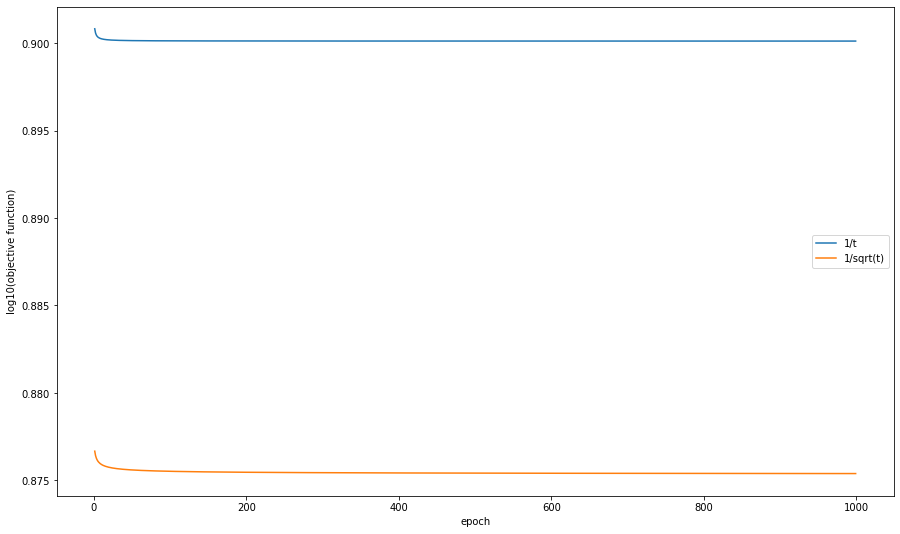

In [235]:
num_epoch = 1000
fig, ax = plt.subplots(figsize = PLOT_DIM)
EPOCH_LIST = list(range(1, num_epoch))
STEP_RULES = ['1/t', '1/sqrt(t)']

for rule in STEP_RULES:
    train_theta, train_loss = stochastic_grad_descent_1(X_train, y_train, alpha=rule, lambda_reg=LAMBDA_OPT, num_epoch=num_epoch, C = 0.1)
    costs = []

    for epoch in EPOCH_LIST:
        theta_epoch = train_theta[epoch, -1, :]
        costs.append(compute_regularized_square_loss(X_train, y_train, theta_epoch, LAMBDA_OPT))
    
    ax.plot(EPOCH_LIST, np.log10(costs), label = rule)

ax.legend()
plt.xlabel('epoch')
plt.ylabel('log10(objective function)')

### Stochastic Gradient Descent - Question 6b)

In [236]:
#######################################
### Stochastic gradient descent
def stochastic_grad_descent_2(X, y, alpha=0.01, lambda_reg=10**-2, num_epoch=1000, C=0.1, eta = 0.1):
    """
    In this question you will implement stochastic gradient descent with regularization term

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - string or float, step size in gradient descent
                NOTE: In SGD, it's not a good idea to use a fixed step size. Usually it's set to 1/sqrt(t) or 1/t
                if alpha is a float, then the step size in every step is the float.
                if alpha == "1/sqrt(t)", alpha = 1/sqrt(t).
                if alpha == "1/t", alpha = 1/t.
        lambda_reg - the regularization coefficient
        num_epoch - number of epochs to go through the whole training set

    Returns:
        theta_hist - the history of parameter vector, 3D numpy array of size (num_epoch, num_instances, num_features)
                     for instance, theta in epoch 0 should be theta_hist[0], theta in epoch (num_epoch) is theta_hist[-1]
        loss hist - the history of loss function vector, 2D numpy array of size (num_epoch, num_instances)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    # theta = np.ones(num_features) #Initialize theta
    theta = np.zeros(num_features)

    theta_hist = np.zeros((num_epoch, num_instances, num_features)) #Initialize theta_hist
    loss_hist = np.zeros((num_epoch, num_instances)) #Initialize loss_hist
    
    def calc_alpha(alpha, t, C = 0.1, eta = 0.1):
        if isinstance(alpha, float):
            return alpha
        
        if alpha == '1/sqrt(t)':
            return C / math.sqrt(t)
        
        if alpha == '1/t':
            return C / t
        
        if alpha == 'reg_step':
            return eta / (1 + eta * lambda_reg * t)

        return 0

    t = 1
    
    for epoch in range(num_epoch):
        for i in range(num_instances):
            x_i = X[i, :]
            y_i = y[i]
            
            theta = theta - calc_alpha(alpha, t, C, eta) * compute_stochastic_gradient(x_i, y_i, theta, lambda_reg)
            theta_hist[epoch, i, :] = theta
            loss_hist[epoch, i] = compute_square_loss(X, y, theta)

            t += 1
    
    return theta_hist, loss_hist

rule = 1/t 	 objective function after 1000 epochs = 7.750390234031733
rule = 1/sqrt(t) 	 objective function after 1000 epochs = 4.737856205620747
rule = reg_step 	 objective function after 1000 epochs = 3.3072230331464927


Text(0, 0.5, 'log10(objective function)')

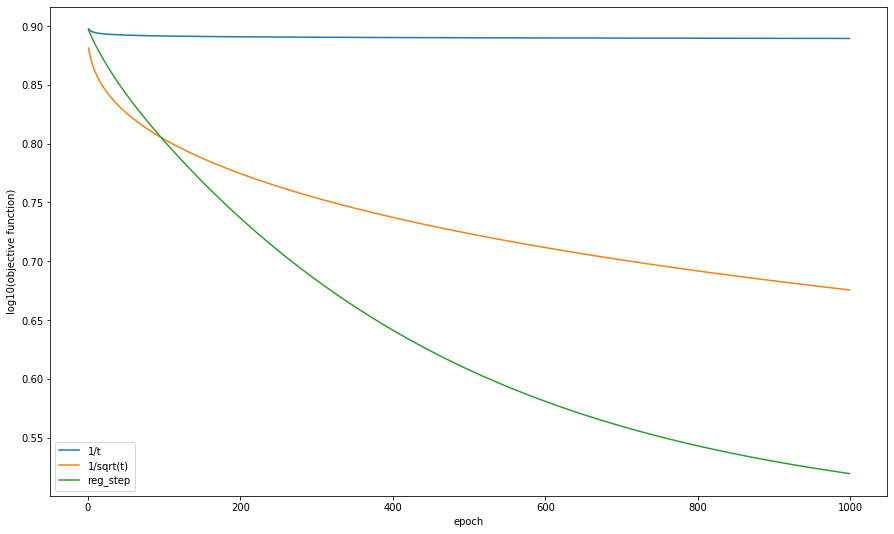

In [237]:
num_epoch = 1000
fig, ax = plt.subplots(figsize = (15, 9))
EPOCH_LIST = list(range(1, num_epoch))
STEP_RULES = ['1/t', '1/sqrt(t)', 'reg_step']

for rule in STEP_RULES:
    train_theta, train_loss = stochastic_grad_descent_2(X_train, y_train, alpha=rule, \
                                lambda_reg=LAMBDA_OPT, num_epoch=num_epoch, C = 0.005, eta = 10**-4)
    costs = []

    for epoch in EPOCH_LIST:
        theta_epoch = train_theta[epoch, -1, :]
        costs.append(compute_regularized_square_loss(X_train, y_train, theta_epoch, LAMBDA_OPT))
    
    print('rule = {} \t objective function after 1000 epochs = {}'.format(rule, costs[-1]))
    ax.plot(EPOCH_LIST, np.log10(costs), label = rule)

ax.legend()
plt.xlabel('epoch')
plt.ylabel('log10(objective function)')

#### Observations

The update rule $\eta_t = \frac{\eta_0}{1+\eta_0 \lambda t}$ outperforms $\frac{1}{t}$ and $\frac{1}{\sqrt t}$ step size update rules for $\eta_0 = 10^{-4}$. <br>
With this rule, we are able to achieve a minimum value of $2.7839999$ for the loss function.